In [2]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import requests as req
import time



from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [3]:
consumer_key = "XIh30Efh7G136MN8Vqi5twwaI"
consumer_secret = "bajkjSsNUku8KXnu8VUBtKOI9gxgKGt41pSlMjZEwdEl2F60Jj"
access_token = "937021977985892353-PLwBW0onG3MjwpWQrb9SPi6wJlpD3Lx"
access_token_secret = "FRIn338if1ldPUD3ttAYNy8fVrpnDOlTqsZ7PWSfHkFx9"


In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [5]:
news_groups=["@nytimes", "@CNN", "@BBC", "@CBS", "@FoxNews"]
sentiment=[]


In [6]:
for news in news_groups:
    counter=1
    for item in tweepy.Cursor(api.user_timeline, id=news).items(100):
        tweet = json.dumps(item._json, indent=3)
        tweet = json.loads(tweet)
        text = tweet['text']
        
         # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        
        news_data={"source": news,"date": tweet['created_at'], "text": text, "compound":compound, "positive":pos, "neutral":neu, "negative": neg,"tweets_ago": counter }
        
        sentiment.append(news_data)
        counter +=1
   

In [7]:
news_df=pd.DataFrame.from_dict(sentiment)
news_df.head()

,compound,date,negative,neutral,positive,source,text,tweets_ago
0,0.5267,Fri Dec 22 02:40:07 +0000 2017,0.098,0.630,0.272,@nytimes,With a surprising number of things to do and s...,1
1,0.0000,Fri Dec 22 02:31:57 +0000 2017,0.000,1.000,0.000,@nytimes,RT @itscaitlinhd: My latest: The Trump Adminis...,2
2,0.5719,Fri Dec 22 02:25:04 +0000 2017,0.000,0.654,0.346,@nytimes,"The NYT review of ""Pitch Perfect 3"" https://t....",3
3,0.2023,Fri Dec 22 02:12:51 +0000 2017,0.000,0.909,0.091,@nytimes,RT @nytpolitics: A meeting involving President...,4
4,0.3400,Fri Dec 22 02:10:06 +0000 2017,0.118,0.658,0.224,@nytimes,After decades of reckless growth and negligent...,5


In [8]:
nytimes= news_df.loc()[news_df['source']=='@nytimes',:]
CNN= news_df.loc()[news_df['source']=='@CNN',:]
BBC= news_df.loc()[news_df['source']=='@BBC',:]
CBS= news_df.loc()[news_df['source']=='@CBS',:]
FoxNews= news_df.loc()[news_df['source']=='@FoxNews',:]


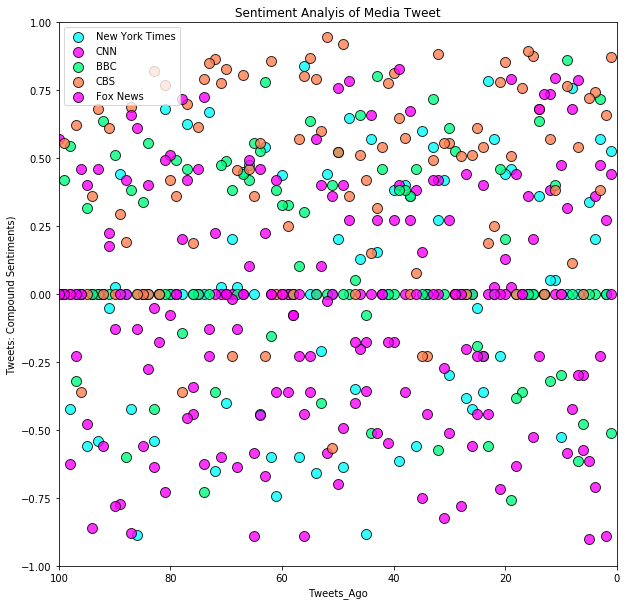

In [10]:
plt.figure(figsize=(10,10))

nytimes_plot=plt.scatter(nytimes['tweets_ago'], nytimes["compound"], color="cyan", s=100, edgecolor="black",alpha= 0.8, label="New York Times")
CNN_plot=plt.scatter(CNN['tweets_ago'], CNN["compound"], color="magenta", s=100, edgecolor="black",alpha= 0.8, label="CNN")
BBC_plot=plt.scatter(BBC['tweets_ago'], BBC["compound"], color="springgreen", s=100, edgecolor="black",alpha= 0.8, label="BBC")
CBS_plot=plt.scatter(CBS['tweets_ago'], CBS["compound"], color="coral", s=100, edgecolor="black",alpha= 0.8, label="CBS")
FoxNews_plot=plt.scatter(FoxNews['tweets_ago'], FoxNews["compound"], color="magenta", s=100, edgecolor="black",alpha= 0.8, label="Fox News")

plt.ylim(-1, 1)
plt.xlim(100, 0)

plt.xlabel("Tweets_Ago")
plt.ylabel("Tweets: Compound Sentiments)")

plt.legend()

# Prints our scatter plot graph to the screen
plt.title("Sentiment Analyis of Media Tweet")
plt.show()


In [11]:
# Group compound sentiments by news and calculate average to graph
# Put into a dataframe
compound_graph = news_df.groupby(['source'])['compound'].mean()
compound_graph= pd.DataFrame(compound_graph)
compound_graph


,compound
source,
@BBC,0.114647
@CBS,0.409749
@CNN,-0.084035
@FoxNews,0.015755
@nytimes,0.026548


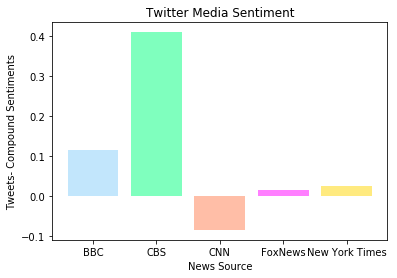

In [12]:
# Graph 2 - News Source vs. Tweet Polarity (Compound Sentiments)
 
news = ['BBC', 'CBS', 'CNN', 'FoxNews', 'New York Times']
colors = ['lightskyblue', 'springgreen', 'coral', 'magenta', 'gold']
Tweet_Polarity = compound_graph['compound']
x_axis = np.arange(len(news))
plt.xticks(x_axis,news)

plt.bar(x_axis, Tweet_Polarity, align='center', alpha=0.5, color = colors)
 
# Label x and y axis
plt.xlabel("News Source")
plt.ylabel("Tweets- Compound Sentiments")

# Prints our bar graph to the screen
plt.title("Twitter Media Sentiment")
plt.show()
